In [3]:
#Zadanie 1

import pandas as pd
import requests

#Pobieranie danych jako listy słowników

def pobieranie_danych(start_date, end_date, currency):
    request_url = 'http://api.nbp.pl/api/exchangerates/rates/A/' + currency + '/' + start_date + '/' + end_date + '/'
    currency_req = requests.get(request_url)
    currency_data = currency_req.json()
    return currency_data['rates'] 

#Wykorzystanie powyższej funkcji do pobrania danych jako dataframe

def pobieranie_danych_jako_dataframe(start_date, end_date, currency):
    currency_data = pobieranie_danych(start_date, end_date, currency)
    return pd.DataFrame.from_dict(currency_data)

#przykład użycia funkcji
#USD = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'USD')
#print(pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'EUR'))

In [ ]:
#Zadanie 2

#pobieranie danych o dolarze amerykanśkim z października
usd = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'USD')
#pobieranie danych o euro z października
eur = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'EUR')

In [ ]:
#Zadanie 3

import pandas as pd

#USD

print("Widok zawartości DataFrame")
print(usd.head()) #widok zawartości datafreme

print("Sprawdzamy typ danych")
print(usd.dtypes) #sprawdzanie typu pobranych danych

print("Zmieniamy typ object na datatime")
usd['effectiveDate'] = pd.to_datetime(usd['effectiveDate']) #zmiana typu danych kolumny z datą na typ datatime

print("Sprawdzamy nowy typ danych kolumny z datami")
print(usd['effectiveDate'].dtypes) #sprawdzenie typu danych kolumny z datą po zmianie
usd = usd.set_index("effectiveDate").drop(columns='no') #zmiana indeksu na datę i usunięcie kolumny "no"
print(usd.head())

#EURO

print("Widok zawartości DataFrame")
print(eur.head()) #widok zawartości dataframe

print("Sprawdzamy typ danych")
print(eur.dtypes) #sprawdzanie typu pobranych danych

print("Zmieniamy typ object na datatime")
eur['effectiveDate'] = pd.to_datetime(eur['effectiveDate']) #zmiana typu danych kolumny z datą na typ datatime

print("Sprawdzamy nowy typ danych kolumny z datami")
print(eur['effectiveDate'].dtypes) #sprawdzenie typu danych kolumny z datą po zmianie
eur = eur.set_index("effectiveDate").drop(columns='no') #zmiana indeksu na datę i usunięcie kolumny "no"
print(eur.head())

In [ ]:
#Zadanie 4

from numpy import corrcoef, array

# pobieranie danych o walutach
usd = pobieranie_danych('2019-10-01', '2019-10-30', 'USD')  
eur = pobieranie_danych('2019-10-01', '2019-10-30', 'EUR')

#tworzenie listy wartości waluty względem złotego 
usd2 = []
for tmp in usd:
    usd2.append(tmp['mid'])

eur2 = []
for tmp in eur:
    eur2.append(tmp['mid'])

#tworzenie tablicy korelacji kursów walut 
corrcoef(array(usd2), array(eur2))

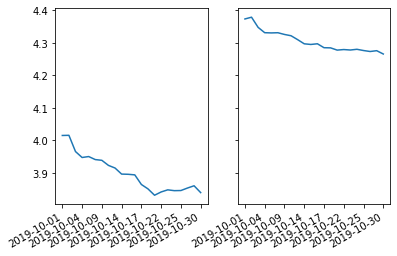

In [4]:
#Zadanie 5

import matplotlib.pyplot as plt

dane_wykres_usd = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'USD').set_index(['effectiveDate'])['mid']
dane_wykres_eur = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-30', 'EUR').set_index(['effectiveDate'])['mid']

fig, axs = plt.subplots(1,2, sharex=True, sharey=True) 

axs[0].plot(dane_wykres_usd) #przypisanie pobranych danych USD do wykresu pierwszego
axs[1].plot(dane_wykres_eur) #przypisanie pobranych danych EURO do wykresu drugiego

#poniższe 3 polecenie zwiekszają czytelność wykresów
fig.autofmt_xdate() #ustawienie opisów osi x pod kontem 45 stopni
tmp_x=9 #określenie ilości wyświetlanych dat na osi x
axs[0].xaxis.set_major_locator(plt.MaxNLocator(tmp_x)) #ograniczenie wyświetlanych wartości dat na osi x do wcześniej zadeklarowanej ilości
#wystarczy to zrobić dla jednego wykresu bo wartości są współdzielone dzięki funkcji plt.subplots

plt.show()